In [170]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import keras

from plot_carbon_isopleth import load_dataset, load_reshape_dataset

%matplotlib inline

In [23]:
# Load dataset as an ordered dictionary and reshape the columns
# as multidimensional arrays
dataset = load_reshape_dataset('../databases/Tcritical.csv')
dataset.keys()

odict_keys(['file', 'macro', 'C', 'Mn', 'Si', 'Cr', 'Ni', 'A1', 'A1prime', 'A3', 'eutectoid', 'idx'])

In [24]:
# Shape of dataset['A3'] multidimensional array
dataset['A3'].shape

(11, 5, 5, 5, 5)

Text(0, 0.5, 'Temperatura A3 (°C)')

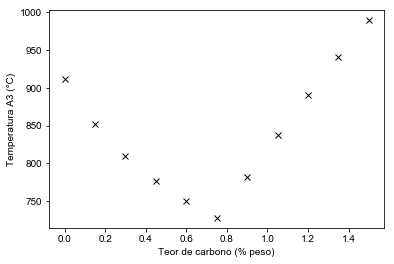

In [62]:
# Plot experimental isopleth
plt.plot(dataset['C'][:,0,0,0,0], dataset['A3'][:,0,0,0,0], 'kx')
plt.xlabel('Teor de carbono (% peso)')
plt.ylabel('Temperatura A3 (°C)')

## Define the scalers

In [134]:
###### Define the normalizing operator *scaler*

# Load dataset as pandas DataFrame
df = load_dataset('../databases/Tcritical.csv')
df = df.drop(['file','macro','A1','A1prime','eutectoid'], axis=1)
# REMOVE ALL A3 NAN
is_na = df['A3'].isna() 
df = df.loc[~is_na, :]
    
# Define scaler for compositions only
scaler_comp = MinMaxScaler(feature_range=[-1, 1])
scaler_comp.fit(df.loc[:,['C','Mn','Si','Cr','Ni']])

# Define scaler for A3 temperature only
scaler_A3 = MinMaxScaler(feature_range=[-1, 1])
scaler_A3.fit(df.loc[:,['A3']])

MinMaxScaler(copy=True, feature_range=[-1, 1])

## Carbon isopleth

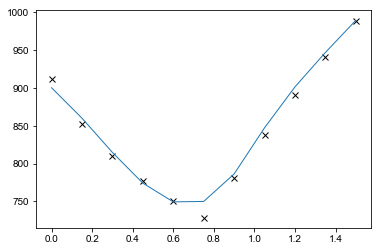

In [167]:
# Load neural network model
model = keras.models.load_model('test.h5')

# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][:,0,0,0,0]
X['Mn'] = dataset['Mn'][:,0,0,0,0]
X['Si'] = dataset['Si'][:,0,0,0,0]
X['Cr'] = dataset['Cr'][:,0,0,0,0]
X['Ni'] = dataset['Ni'][:,0,0,0,0]
# print(X.head())

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)
# print(Xnorm.head())

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

plt.plot(dataset['C'][:,0,0,0,0], dataset['A3'][:,0,0,0,0], 'kx')
plt.plot(dataset['C'][:,0,0,0,0], y)

## Manganese isopleth

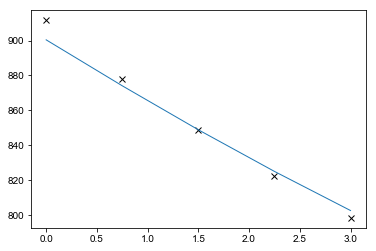

In [166]:
# Load neural network model
model = keras.models.load_model('test.h5')

# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][0,:,0,0,0]
X['Mn'] = dataset['Mn'][0,:,0,0,0]
X['Si'] = dataset['Si'][0,:,0,0,0]
X['Cr'] = dataset['Cr'][0,:,0,0,0]
X['Ni'] = dataset['Ni'][0,:,0,0,0]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
plt.plot(dataset['Mn'][0,:,0,0,0], dataset['A3'][0,:,0,0,0], 'kx')
plt.plot(dataset['Mn'][0,:,0,0,0], y)